#
**1 - TESTE DE HIPÓTESE MATÉRIA ORGÂNICA**

In [23]:
import pandas as pd

# Importar DataFrame JV
co2_pts_jv = pd.read_csv('C:\\Users\\Alisson Medeiros\\tese_cap6\\tabelas\\JV_SOC_GKG_med.csv', sep = ';', encoding = 'UTF-8')

# Importar DataFrame MAR
co2_pts_mar = pd.read_csv('C:\\Users\\Alisson Medeiros\\tese_cap6\\tabelas\\MAR_SOC_GKG_med.csv', sep = ';', encoding = 'UTF-8')
co2_pts_jv
co2_pts_mar

,Unnamed: 0,index,Ponto,MO_g_Kg_1,latitude,longitude,geometry
0,0,0,P1,73.122202,-6.069449,-37.885254,POINT (-37.885254 -6.069449)
1,1,1,P2,39.207252,-6.088487,-37.901950,POINT (-37.90195 -6.088487)
2,2,2,P3,22.030000,-6.055249,-37.908521,POINT (-37.908521 -6.055249)
3,3,3,P5,25.312250,-6.113206,-37.901073,POINT (-37.901073 -6.113206)
4,4,4,P7,39.290000,-6.105825,-37.926200,POINT (-37.9262 -6.105825)
5,5,5,P9,39.665000,-6.060547,-37.930371,POINT (-37.930371 -6.060547)
6,6,6,P10,15.890000,-6.087906,-37.890844,POINT (-37.890844 -6.087906)
7,7,7,P13,11.842731,-6.096004,-37.957903,POINT (-37.957903 -6.096004)
8,8,8,P14,7.187327,-6.128841,-37.982047,POINT (-37.982047 -6.128841)
9,9,9,P15,4.867737,-6.103991,-37.972415,POINT (-37.972415 -6.103991)


In [20]:
#Excluir colunas
co2_pts_jv = co2_pts_jv.drop(columns=['Unnamed: 0', 'Ponto','latitude','longitude'])

#Excluir linhas
co2_pts_jv = co2_pts_jv.drop(1)
co2_pts_jv

,MO_g_Kg_1
0,12.920000
2,44.112412
3,62.422152
4,36.597130
5,53.557256
6,24.345010
7,23.310000
8,19.950000
9,28.230000


In [24]:
#Excluir colunas
co2_pts_mar = co2_pts_mar.drop(columns=['Unnamed: 0', 'index','latitude','longitude','geometry'])

#Excluir linhas
co2_pts_mar = co2_pts_mar.drop([0,2,10,11,13])
co2_pts_mar

,Ponto,MO_g_Kg_1
1,P2,39.207252
3,P5,25.312250
4,P7,39.290000
5,P9,39.665000
6,P10,15.890000
7,P13,11.842731
8,P14,7.187327
9,P15,4.867737
12,P18,7.149363


In [13]:
#TESTE DE NORMALIDADE PARA MO JOÃO DO VALE
#Importar bibliotecas
import scipy.stats as stats
import statsmodels
from statsmodels.stats.diagnostic import lilliefors
import pandas as pd

#Teste de normalidade dos pontos amostrais
statsmodels.stats.diagnostic.lilliefors(co2_pts_jv.MO_g_Kg_1, dist = 'norm')

#O valor de p é  0.4573785797510448, MAIOR do que 0,05. DISTRIBUIÇÃO NORMAL

(0.19075212897250027, 0.4573785797510448)

In [15]:
#TESTE DE NORMALIDADE MO PARA MARTINS
#Importar bibliotecas
import scipy.stats as stats
import statsmodels
from statsmodels.stats.diagnostic import lilliefors
import pandas as pd

#Teste de normalidade dos pontos amostrais
statsmodels.stats.diagnostic.lilliefors(co2_pts_mar.MO_g_Kg_1, dist = 'norm')

#O valor de p é  0.2428285569894069, MAIOR do que 0,05. DISTRIBUIÇÃO NORMAL

(0.21984656952148784, 0.2428285569894069)

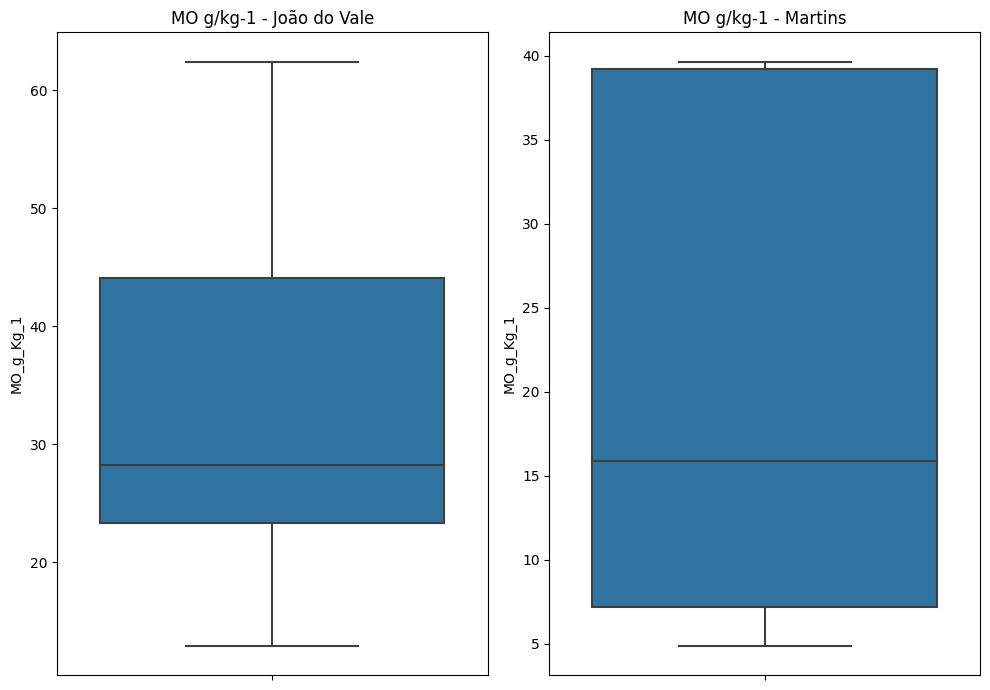

In [21]:
#PLOTAR GRÁFICOS BOXPLOT
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Criar a figura e eixos
fig, axes = plt.subplots(1, 2, figsize=(10, 7))

# Plotar os gráficos de precipitação
sns.boxplot(data=co2_pts_jv, y="MO_g_Kg_1", ax=axes[0])
sns.boxplot(data=co2_pts_mar, y="MO_g_Kg_1", ax=axes[1])

#Ajustar os títulos
axes[0].set_title("MO g/kg-1 - João do Vale")
axes[1].set_title("MO g/kg-1 - Martins")

# Melhorar o layout
plt.tight_layout()
plt.savefig("pts_MO_jv_mart_BOX_PLOT")
plt.show()

**Teste de Levene para duas amostras independentes: Se o valor-p for menor ou igual ao nível de significância (0,05), a hipótese nula pode ser rejeitada.**

Hipótese Nula (H0): As variâncias de todas as amostras são iguais (homocedasticidade) (p > 0,05)

Hipótese Alternativa (H1): As variâncias de pelo menos duas amostras são diferentes (heterocedasticidade) (p <= 0,05)

In [40]:
#Teste de Levene (é um teste estatístico usado para verificar se as variâncias de duas ou mais amostras são iguais (homocedasticidade))
import scipy.stats as stats
import pandas as pd

#Realizar o teste de Levene
teste_levene = stats.levene(co2_pts_jv['MO_g_Kg_1'], co2_pts_mar['MO_g_Kg_1'], center='mean')
teste_levene

LeveneResult(statistic=0.019942038589445318, pvalue=0.8894617840773287)

pvalue=0.8894617840773287

**HIPÓTESE NULA NÃO PODE SER DESCARTADA**

Hipótese Nula (H0): As variâncias de todas as amostras são iguais (homocedasticidade) (p > 0,05)

**Teste t de Student para duas amostras independentes: Se o valor-p for menor ou igual ao nível de significância (0,05), a hipótese nula pode ser rejeitada.**

Hipótese nula: as médias dos grupos são iguais e os serviços de estoque de materia orgânica no solo entre BJ e serra secas são iguais (p > 0,05)

Hipótese alternativa: há diferenças significativas entre as médias dos conjuntos e os serviços de estoque de materia orgânica no solo entre BJ e serra secas NÃO SÃO IGUAIS (p <= 0,05)

In [27]:
#Teste t de Student para duas amostras independentes
from scipy import stats

#Realizar o teste t
t_statistic, p_value = stats.ttest_ind(co2_pts_jv, co2_pts_mar)
print('t_statistic = ',t_statistic)
print('p_value = ',p_value)

t_statistic =  [1.7218169]
p_value =  [0.1043752]


p_value =  [0.1043752]

**HIPÓTESE NULA NÃO PODE SER DESCARTADA**

Hipótese nula: as médias dos grupos são iguais e os serviços de estoque de materia orgânica no solo entre BJ e serra secas são iguais (p > 0,05)

#
**2 - TESTE DE HIPÓTESE CO2FLUX**

In [1]:
#Importar bibliotecas
import pandas as pd
import geopandas as gpd
import os

#Importar dados das amostras de co2flux de JV
#Criar variáveis referentes a cada planilha
co2_JV = pd.read_csv("C:\\Users\\Alisson Medeiros\\tese_cap6\\tabelas\\CO2_flux_Pixel_Values_Export_JV.csv", sep = ',', encoding = 'utf-8')

#Excluir colunas
co2_JV = co2_JV.drop(columns=['system:index', '.geo'])

#Excluir valores NaN (nulos)
co2_JV = co2_JV.dropna()

#Análise de valores missing
co2_JV.isnull().sum()

CO2FLUX8    0
dtype: int64

In [3]:
#Importar bibliotecas
import pandas as pd
import geopandas as gpd
import os

#Importar dados das amostras de co2flux de MAR
#Criar variáveis referentes a cada planilha
co2_MAR = pd.read_csv("C:\\Users\\Alisson Medeiros\\tese_cap6\\tabelas\\CO2_flux_Pixel_Values_Export_MAR.csv", sep = ',', encoding = 'utf-8')

#Excluir colunas
co2_MAR = co2_MAR.drop(columns=['system:index', '.geo'])

#Excluir valores NaN (nulos)
co2_MAR = co2_MAR.dropna()

#Análise de valores missing
co2_MAR.isnull().sum()

CO2FLUX8    0
dtype: int64

In [7]:
#TESTE DE NORMALIDADE PARA MO JOÃO DO VALE
#Importar bibliotecas
import scipy.stats as stats
import statsmodels
from statsmodels.stats.diagnostic import lilliefors
import pandas as pd

#Teste de normalidade dos pontos amostrais
statsmodels.stats.diagnostic.lilliefors(co2_JV.CO2FLUX8, dist = 'norm')

#O valor de p é  0.0021502673870336265, MENOR do que 0,05. DISTRIBUIÇÃO NÃO É NORMAL

(0.1215274197290287, 0.0021502673870336265)

In [8]:
#TESTE DE NORMALIDADE MO PARA MARTINS
#Importar bibliotecas
import scipy.stats as stats
import statsmodels
from statsmodels.stats.diagnostic import lilliefors
import pandas as pd

#Teste de normalidade dos pontos amostrais
statsmodels.stats.diagnostic.lilliefors(co2_MAR.CO2FLUX8, dist = 'norm')

#O valor de p é  0.0009999999999998899, MENOR do que 0,05. DISTRIBUIÇÃO NÃO É NORMAL

(0.1607660150200272, 0.0009999999999998899)

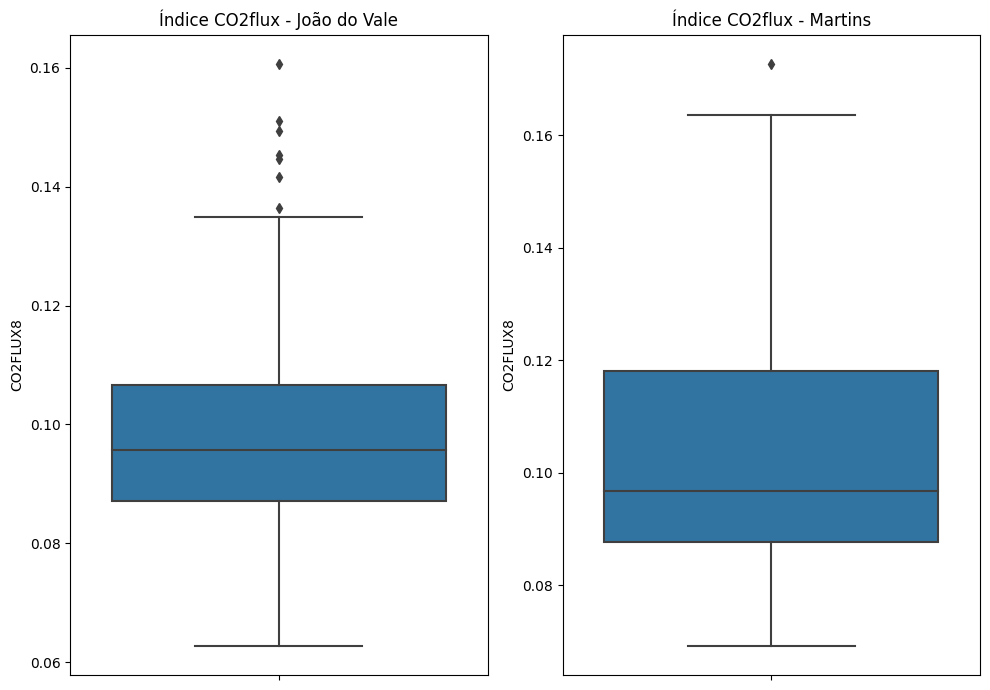

In [9]:
#PLOTAR GRÁFICOS BOXPLOT
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Criar a figura e eixos
fig, axes = plt.subplots(1, 2, figsize=(10, 7))

# Plotar os gráficos de precipitação
sns.boxplot(data=co2_JV, y="CO2FLUX8", ax=axes[0])
sns.boxplot(data=co2_MAR, y="CO2FLUX8", ax=axes[1])

#Ajustar os títulos
axes[0].set_title("Índice CO2flux - João do Vale")
axes[1].set_title("Índice CO2flux - Martins")

# Melhorar o layout
plt.tight_layout()
plt.savefig("indice_co2_jv_mart_BOX_PLOT")
plt.show()

**Mann-Whitney U: Se o valor-p for menor ou igual ao nível de significância (0,05), a hipótese nula pode ser rejeitada.**

Hipótese nula: as medianas dos grupos são iguais e NÃO EXISTE DIFERENÇAS NA EFICIÊCIA DE SEQUESTRAR CO2 ATMOSFÉRICO (p > 0,05)

Hipótese alternativa: há diferenças significativas entre os conjuntos e EXISTE DIFERENÇAS NA EFICIÊCIA DE SEQUESTRAR CO2 ATMOSFÉRICO (p <= 0,05)

In [10]:
#Teste de Mann-Whitney
from scipy.stats import mannwhitneyu

#Teste de Mann-Whitney U para SAN_MART
u_stat, p_value = mannwhitneyu(co2_JV['CO2FLUX8'], co2_MAR['CO2FLUX8'])
print(f"Mann-Whitney U: U = {u_stat}, p = {p_value}")

Mann-Whitney U: U = 3862.0, p = 0.44694719463835786


**p = 0.44694719463835786 > 0,05: HIPÓTESE NULA NÃO PODE SER DESCARTADA**

Hipótese nula: as medianas dos grupos são iguais e NÃO EXISTE DIFERENÇAS NA EFICIÊCIA DE SEQUESTRAR CO2 ATMOSFÉRICO (p > 0,05)